<a href="https://colab.research.google.com/github/utsav972/Computer-Vision-Matarials/blob/main/yolo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Apr 30 17:04:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YIqpe59XxIGhiRKcgPfu")
project = rf.workspace("utsav-fpjwy").project("car-defect-detection-nfjfw-k4evp")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 137.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-defect-detection-1 in yolov8:: 100%|██████████| 2148/2148 [00:00<00:00, 6998.25it/s]


In [5]:
dataset.location

'/content/Car-defect-detection-1'

In [6]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=40 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 61.0MB/s]
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Car-defect-detection-1/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

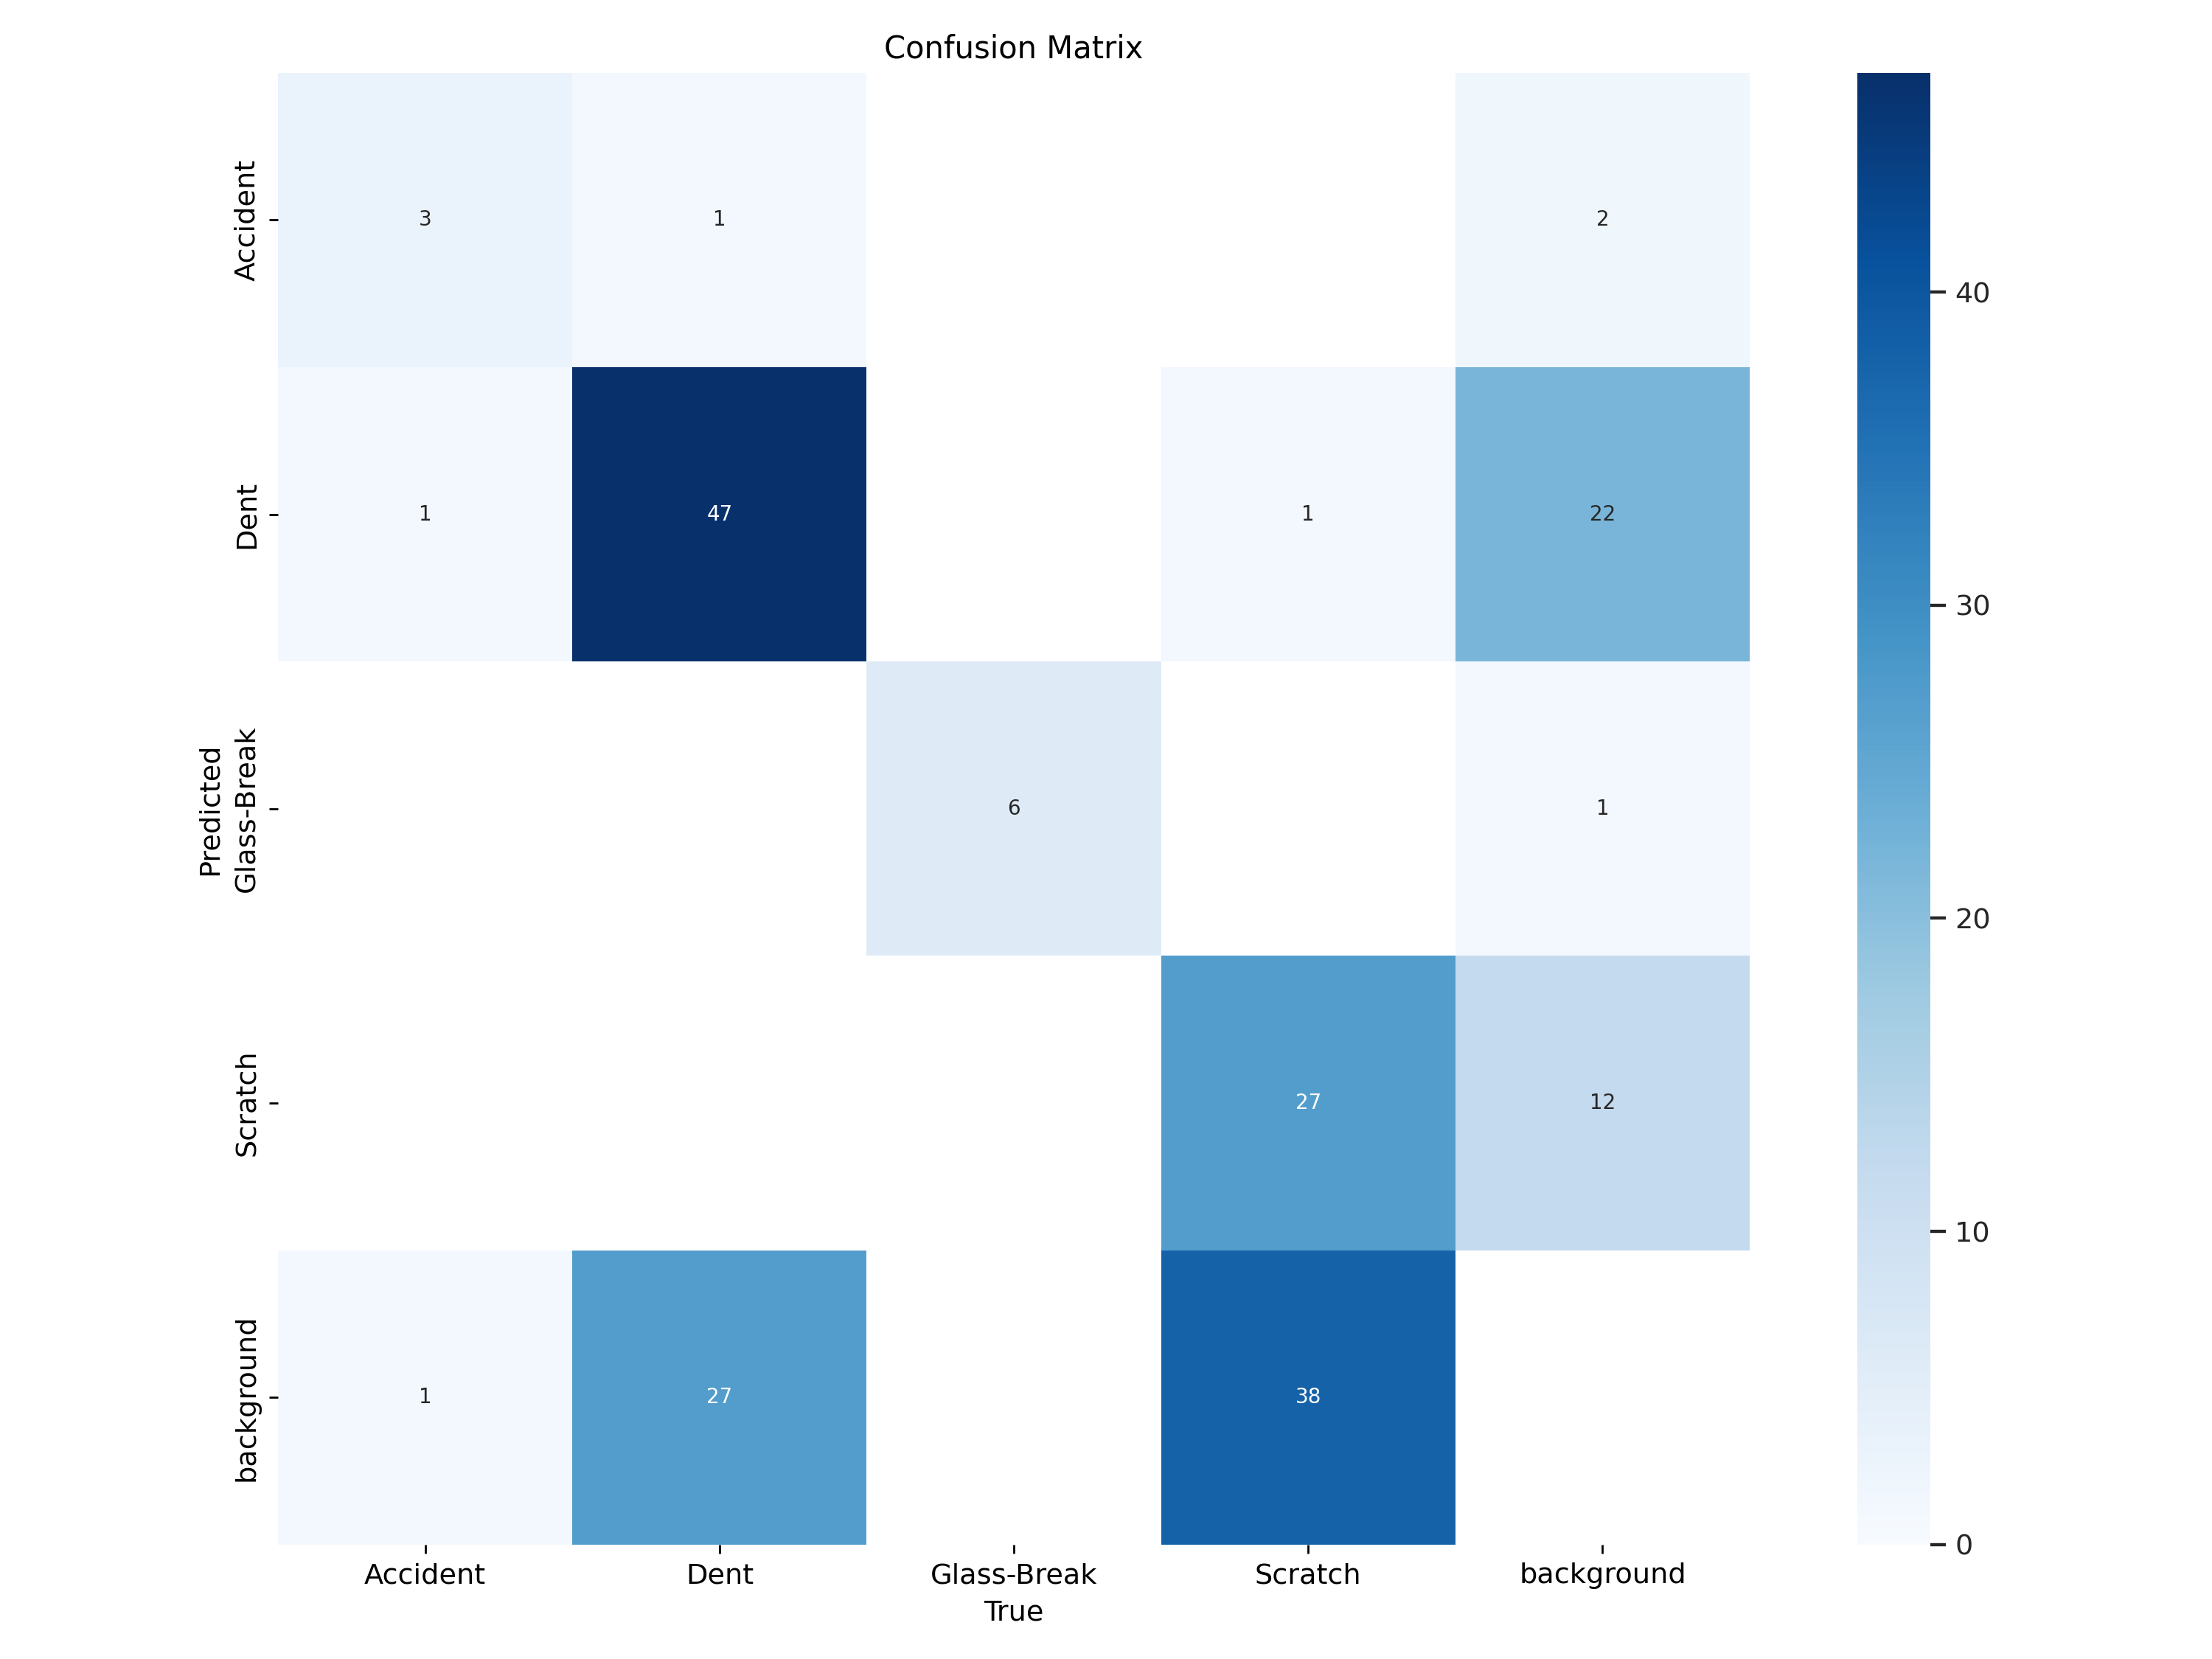

In [7]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

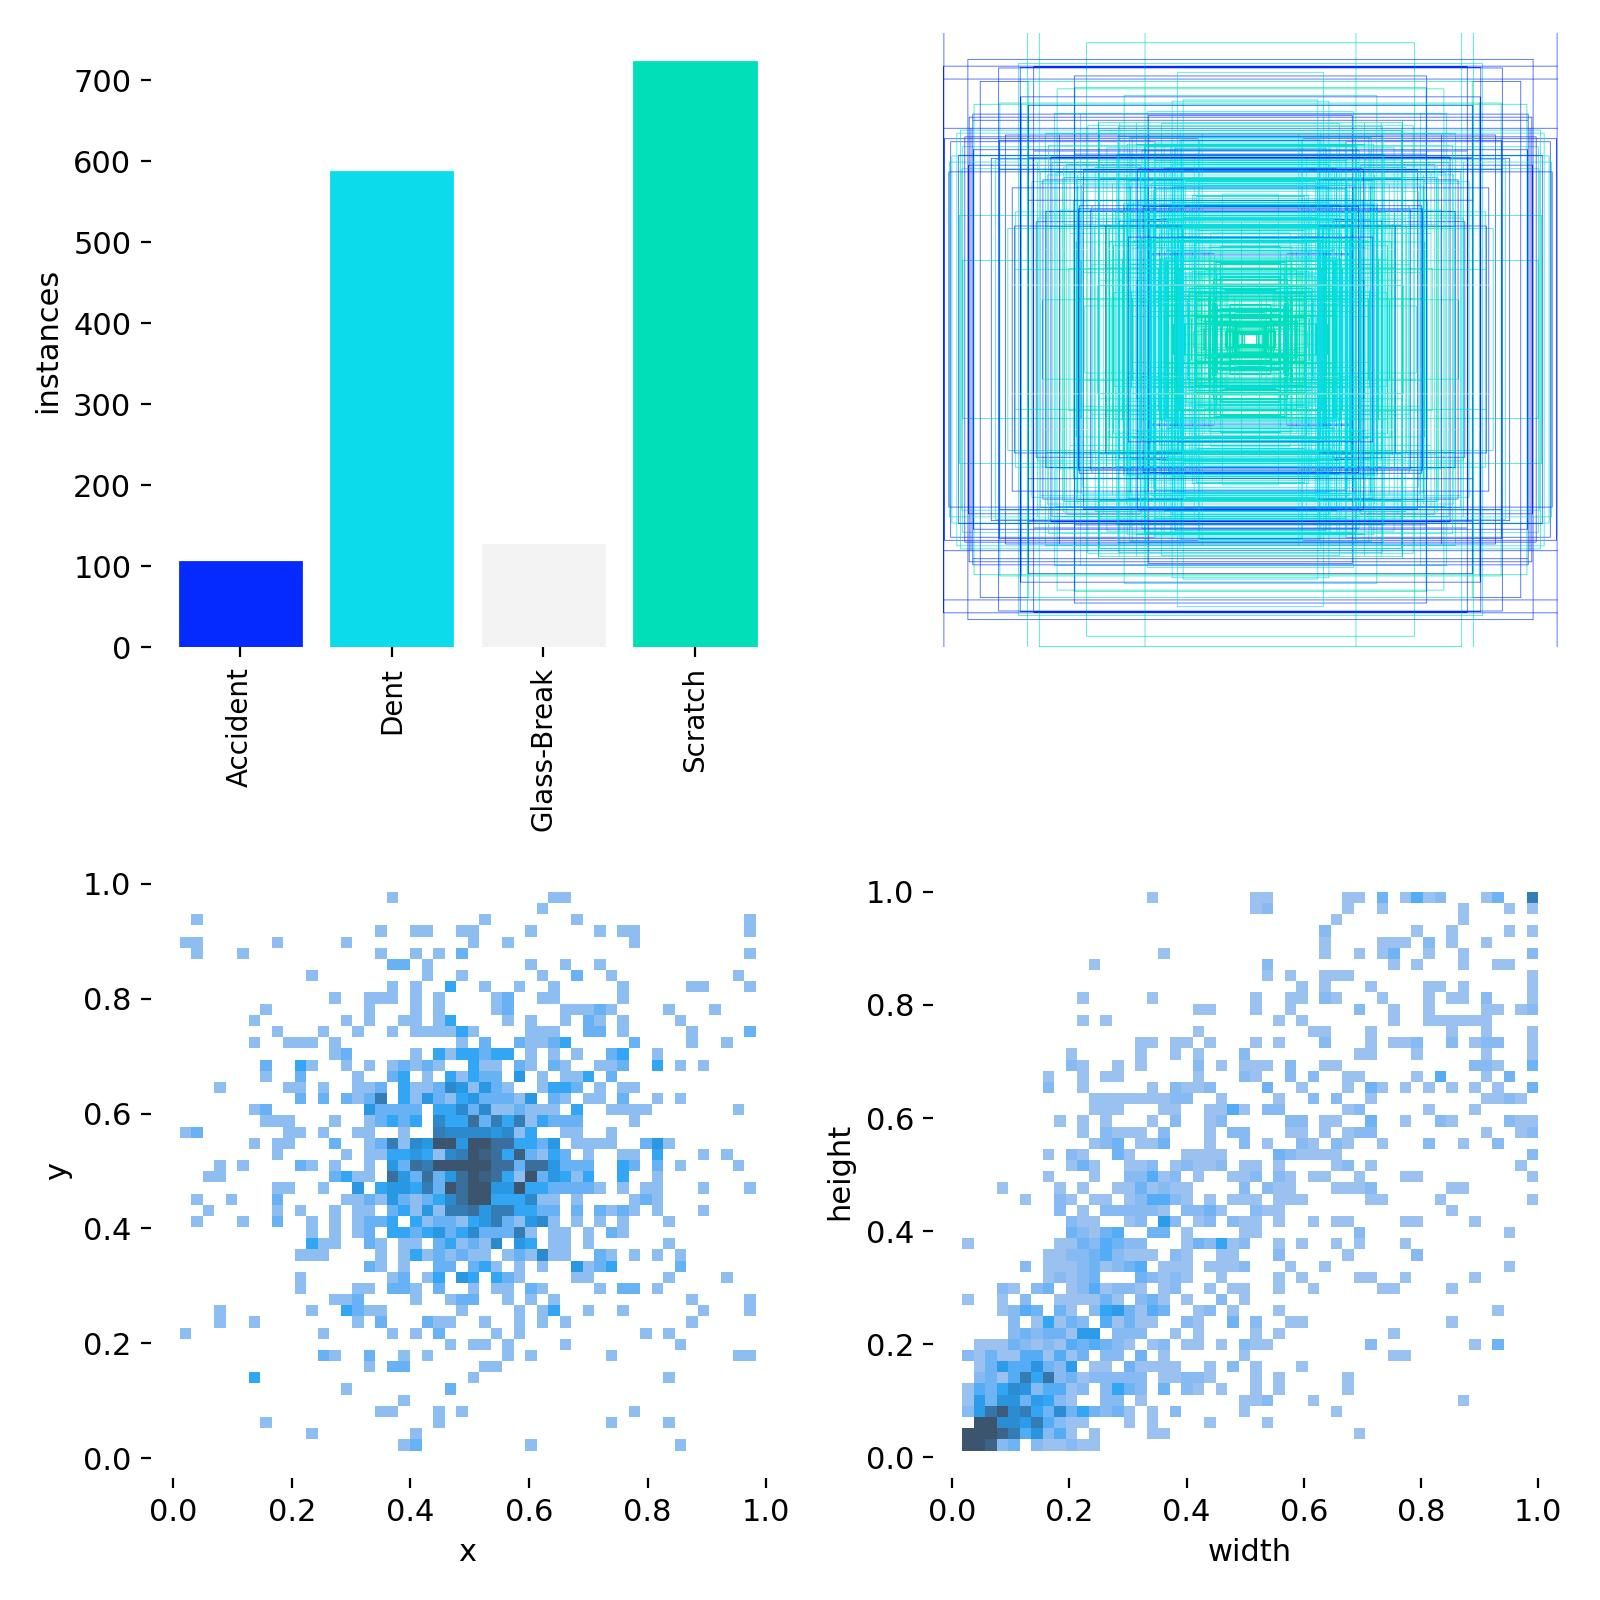

In [8]:

Image("/content/runs/detect/train/labels.jpg", width=600)

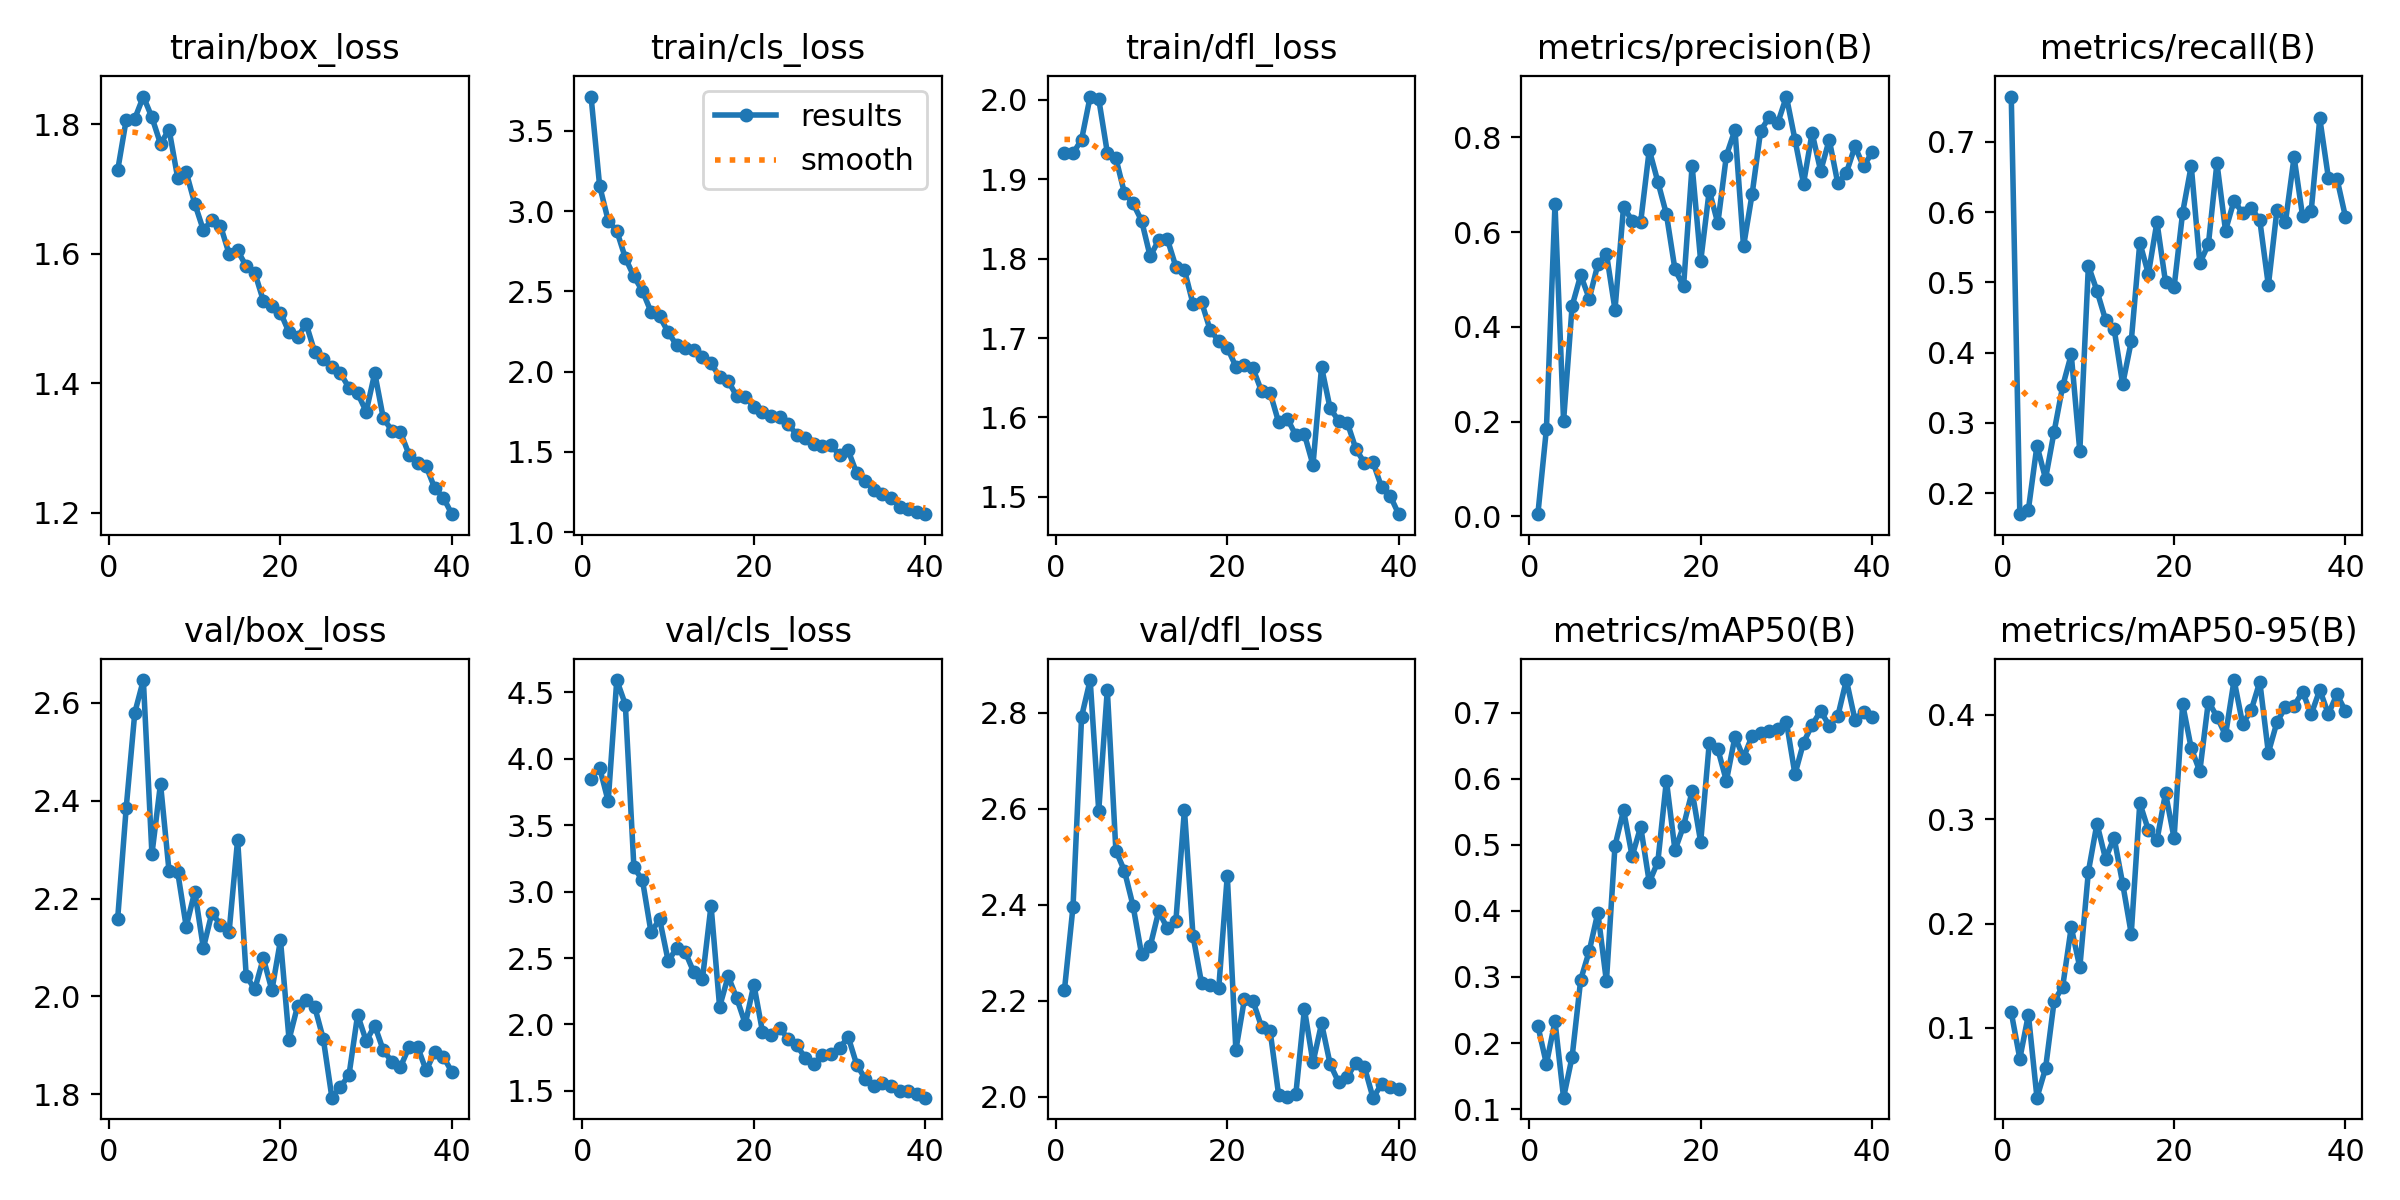

In [9]:
Image("/content/runs/detect/train/results.png", width=600)

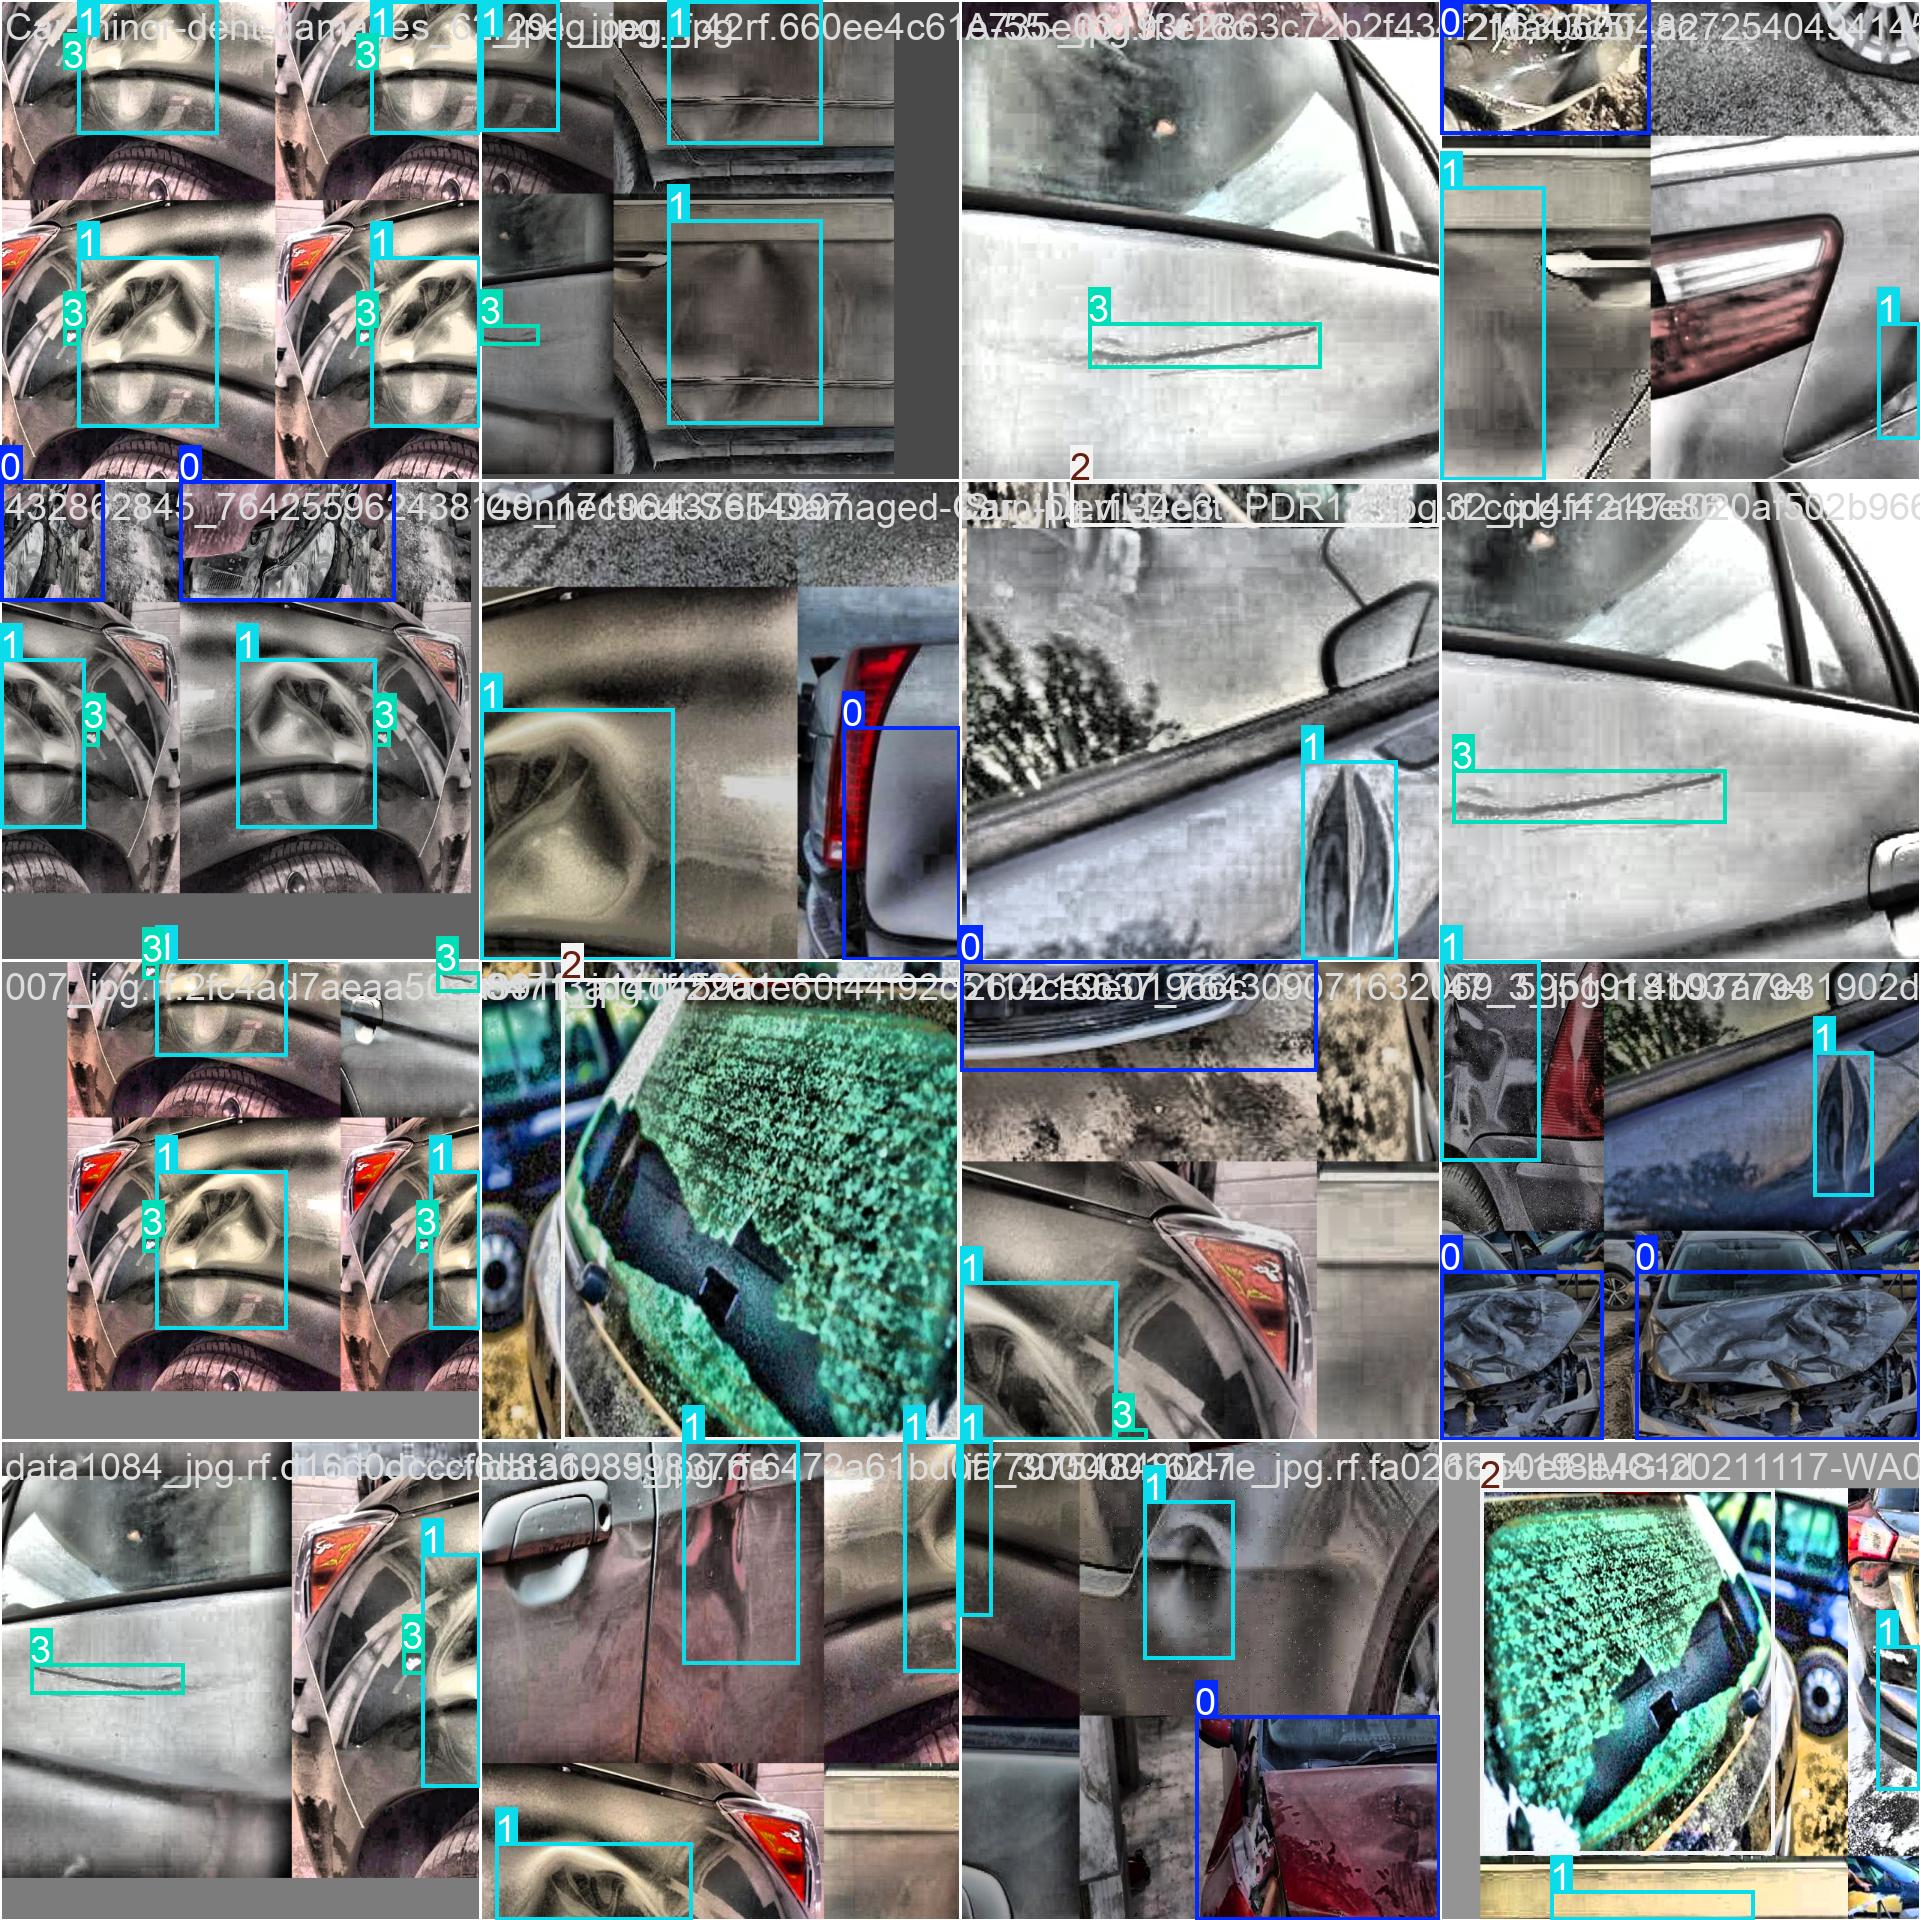

In [10]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

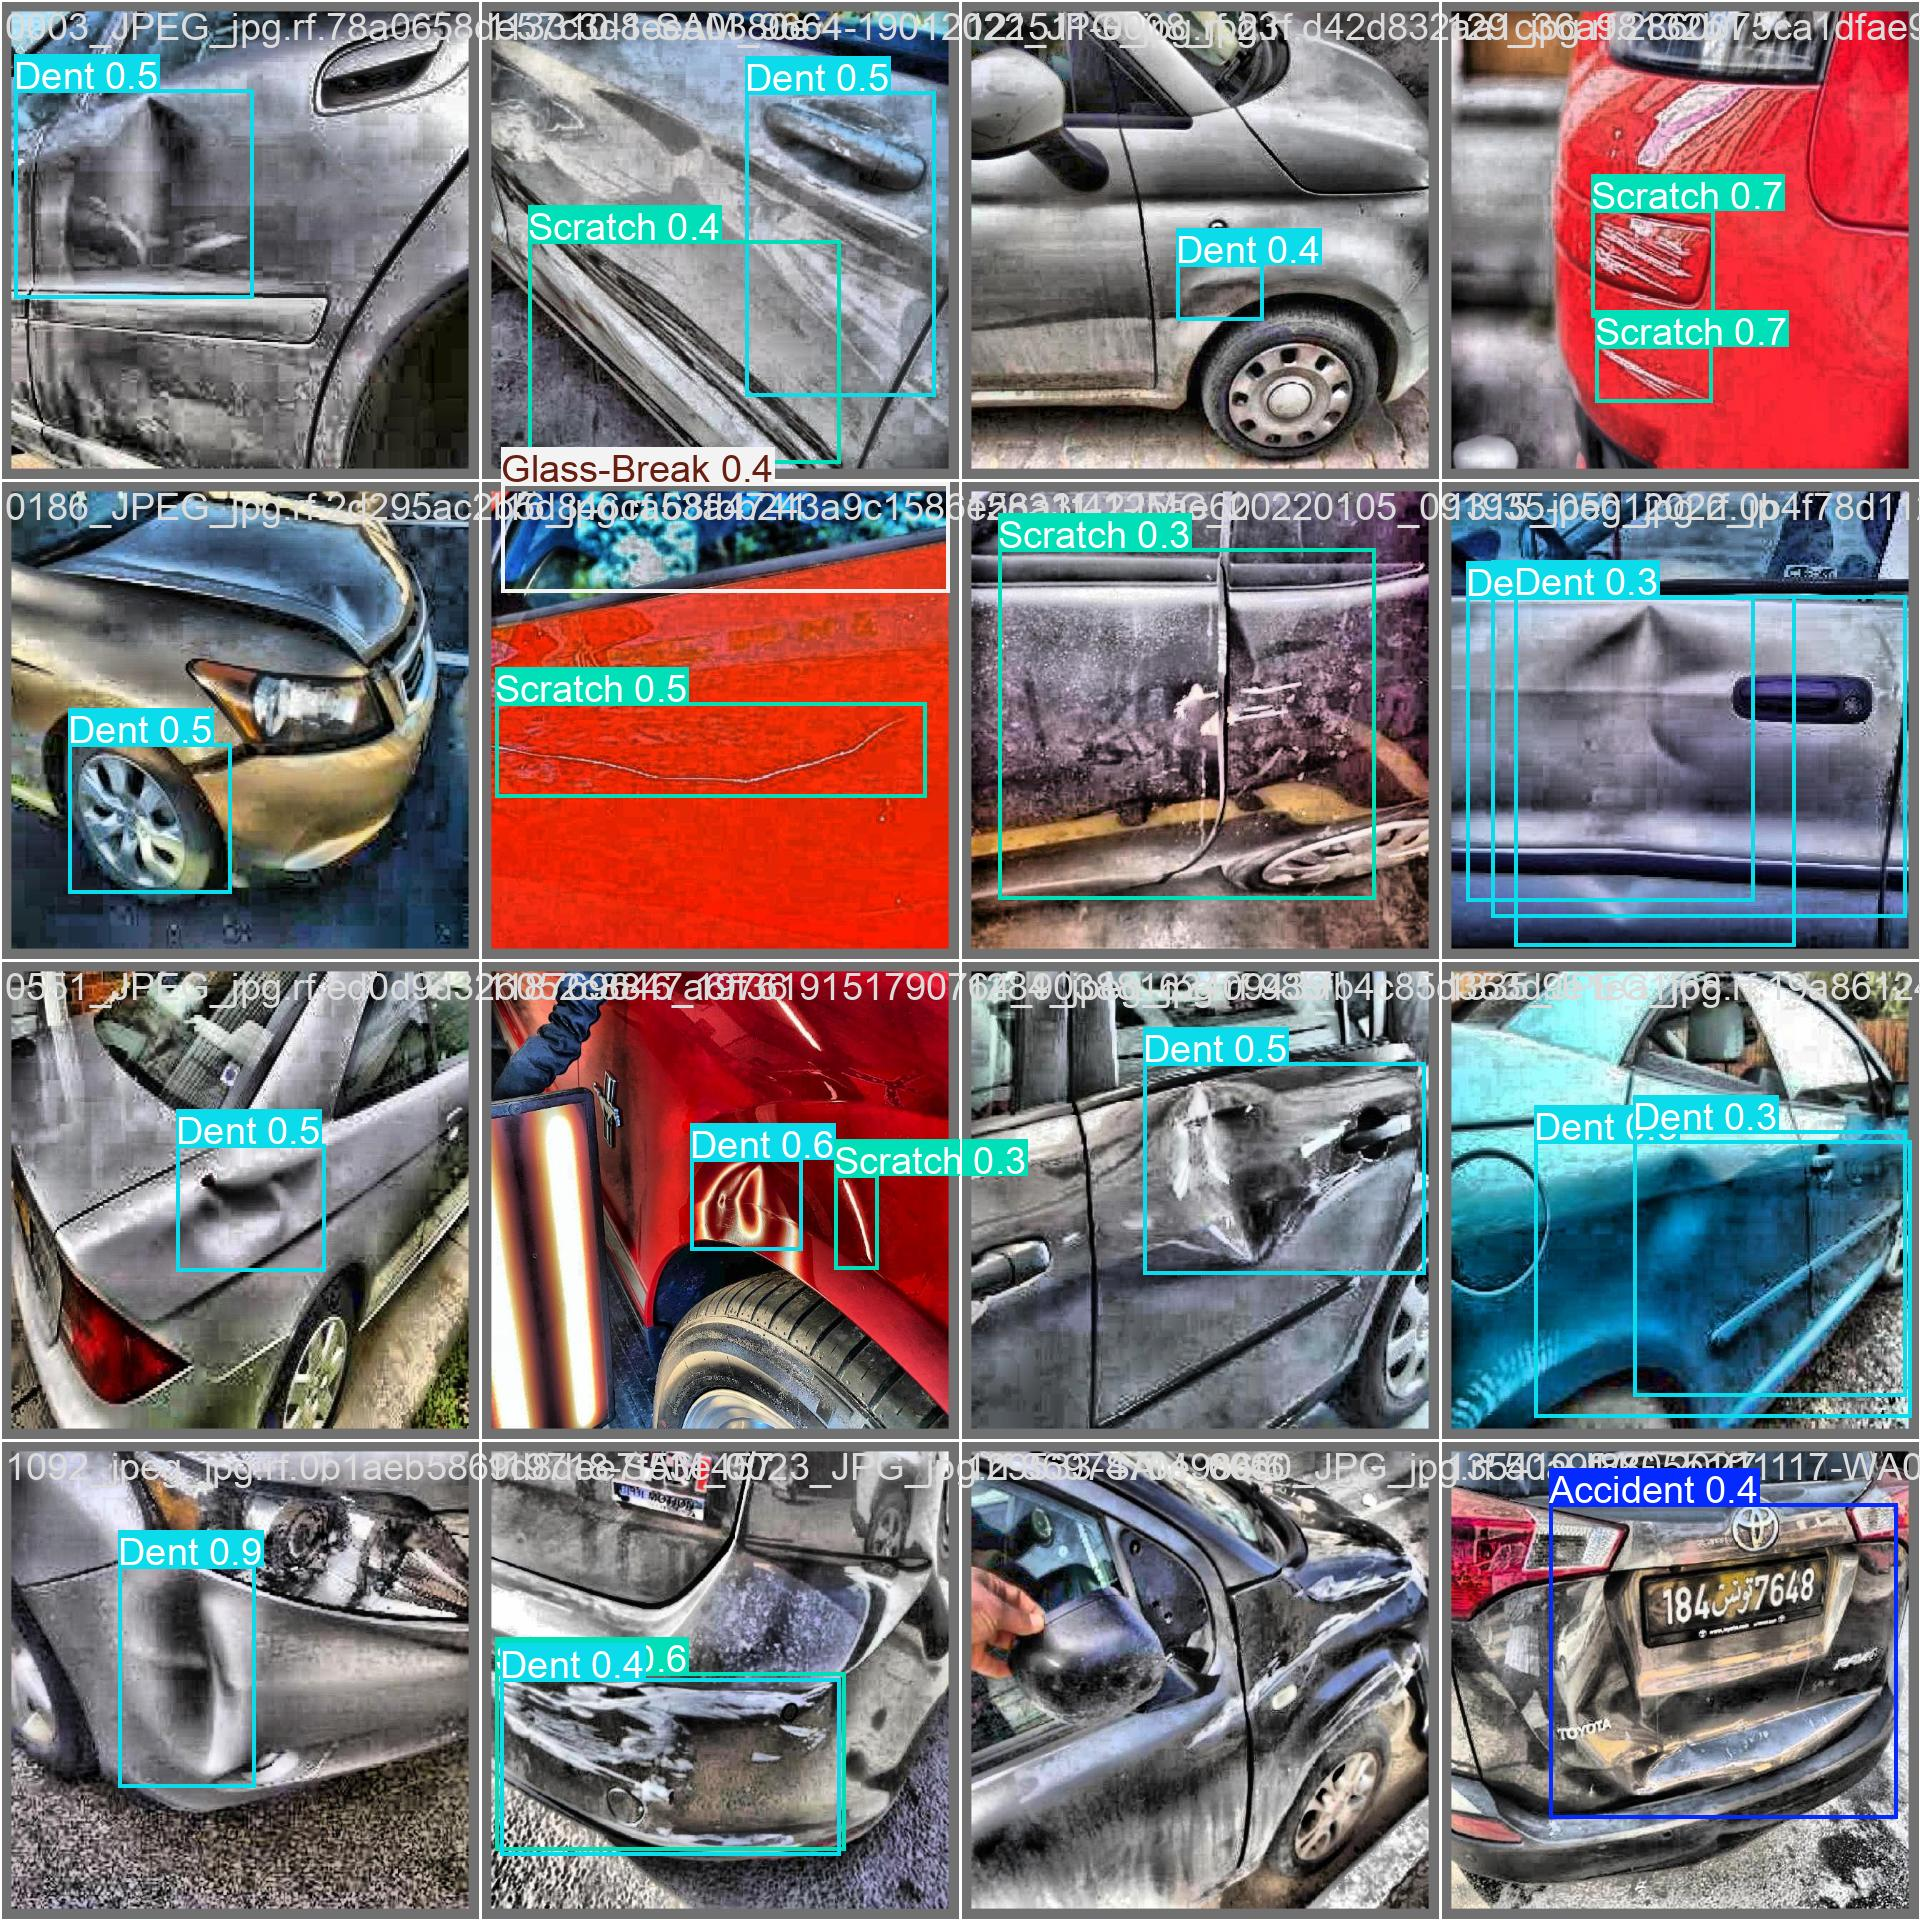

In [11]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

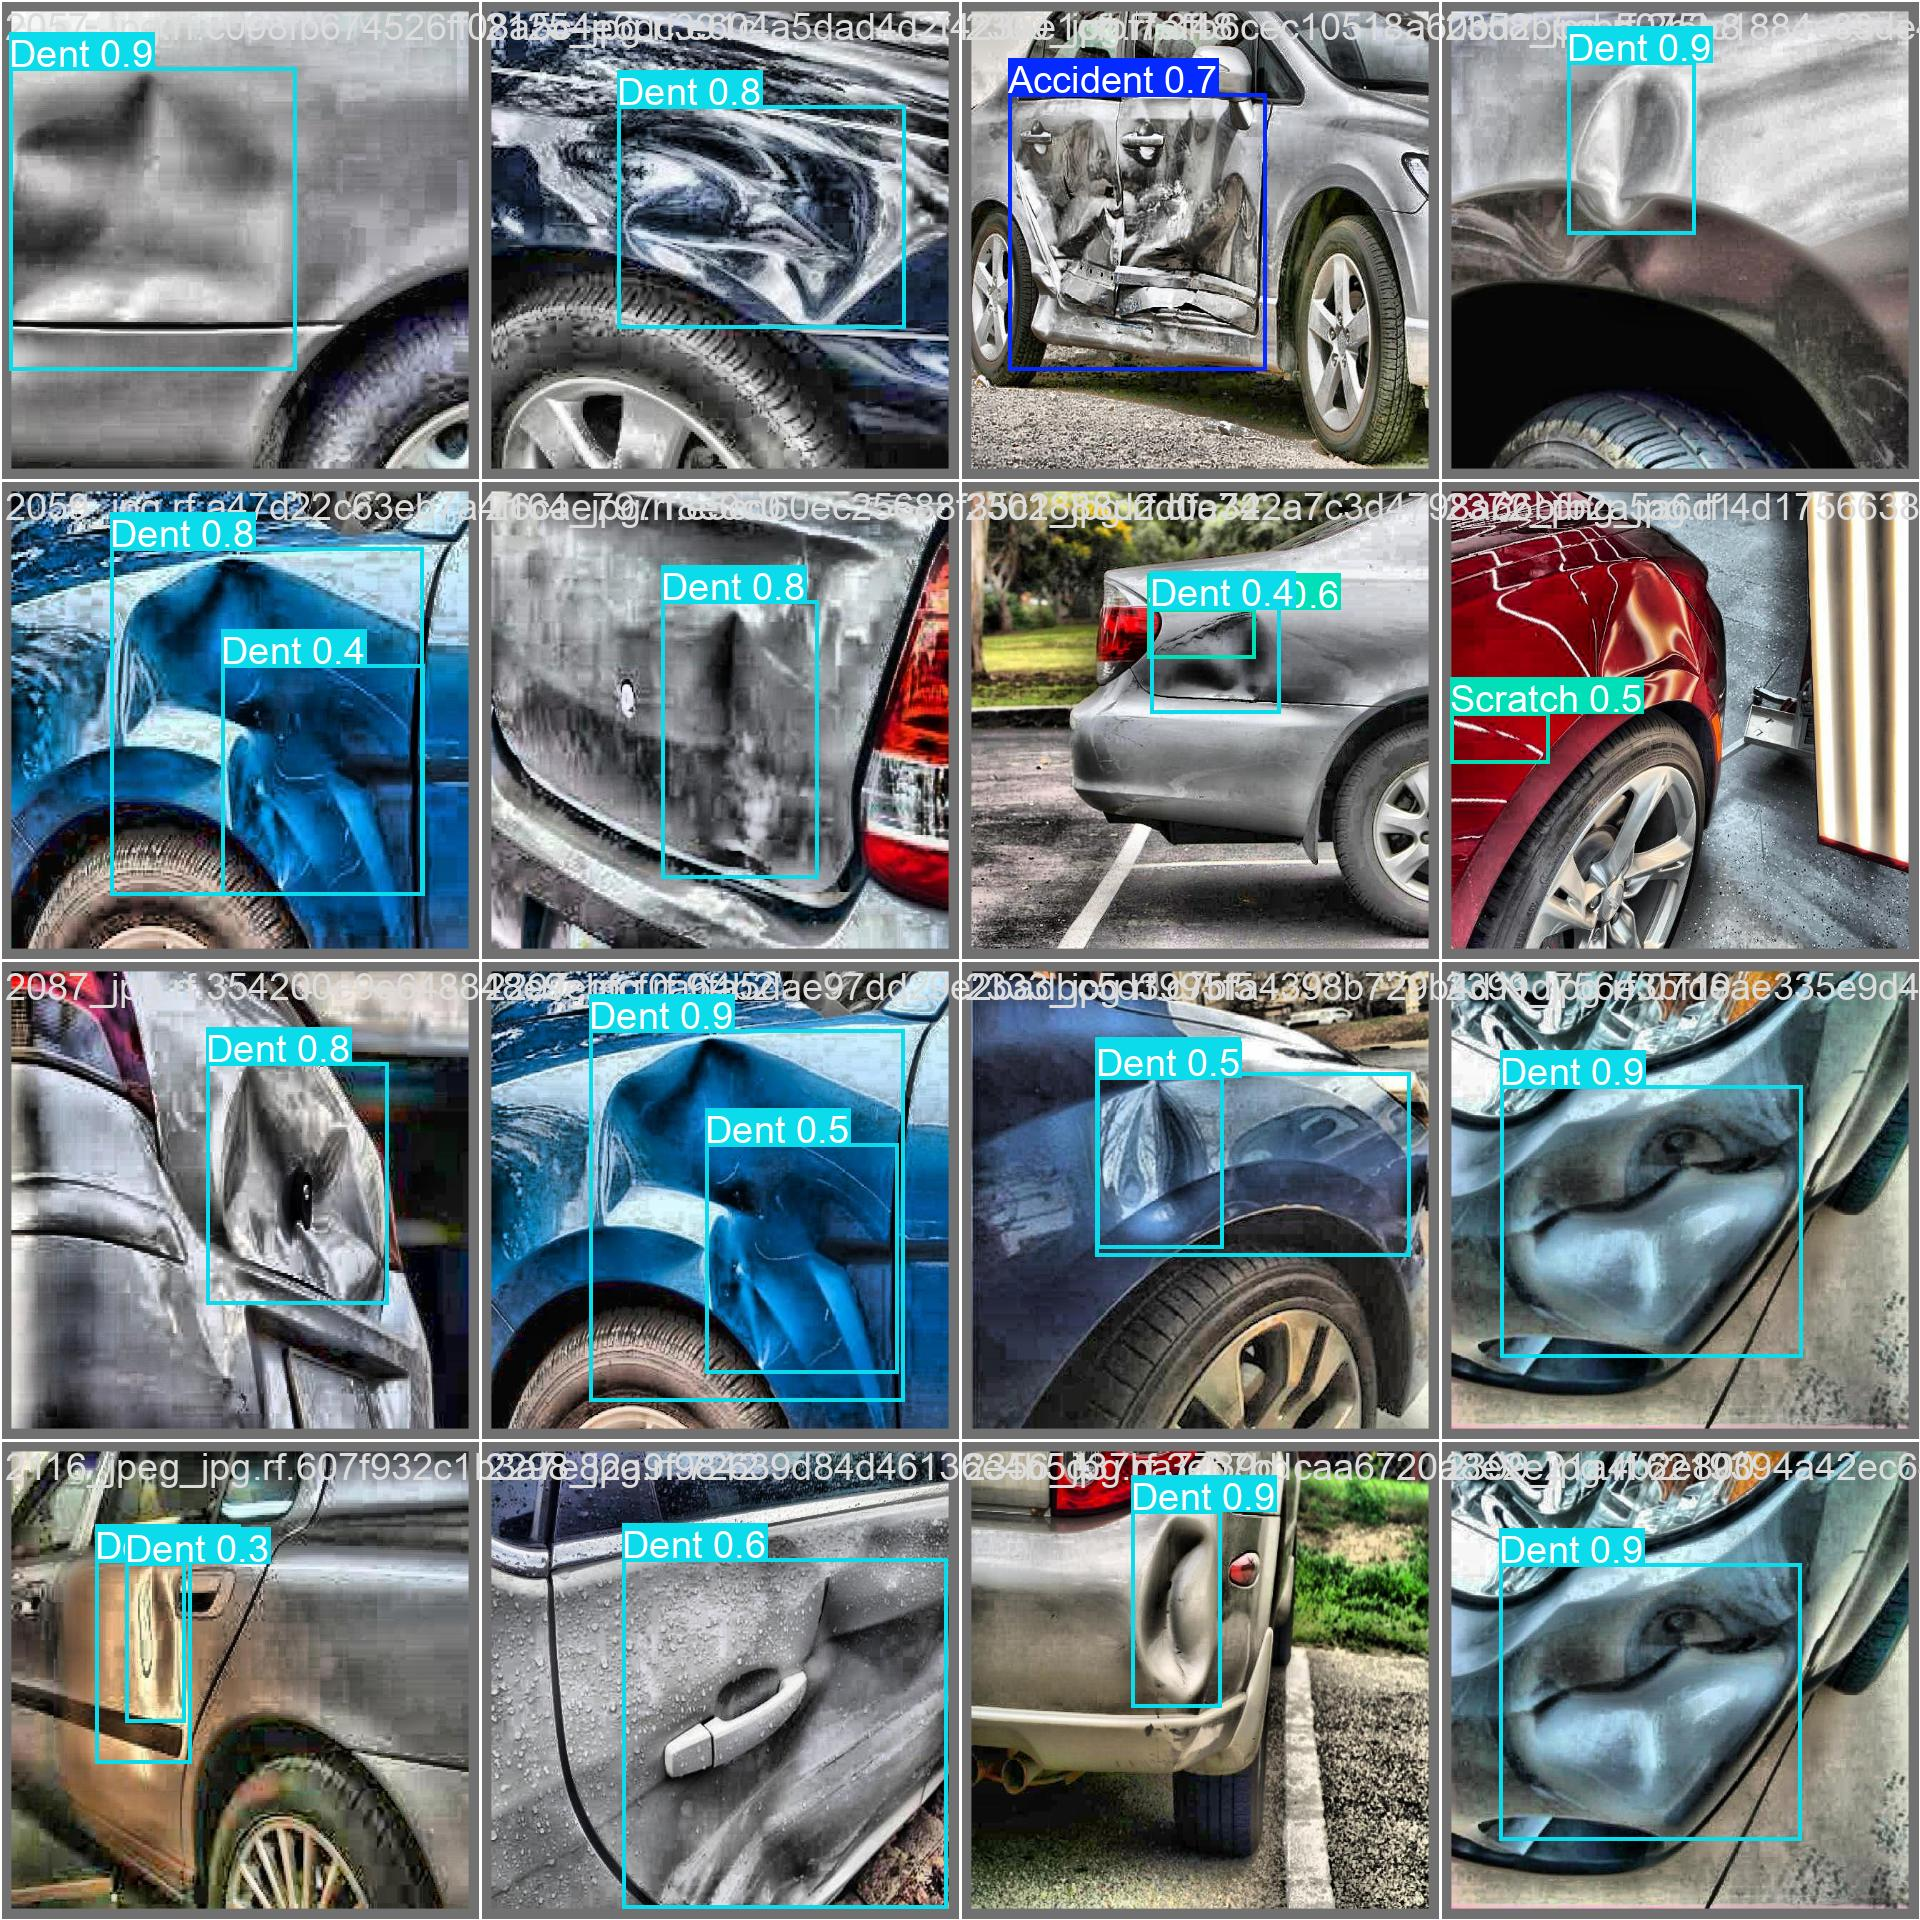

In [12]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [13]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1609.7±966.5 MB/s, size: 76.5 KB)
val: Scanning /content/Car-defect-detection-1/valid/labels.cache... 103 images, 0 backgrounds, 0 corrupt: 100% 103/103 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:01<00:00,  4.22it/s]
                   all        103        152      0.878      0.589      0.687      0.432
              Accident          5          5      0.923        0.6      0.642      0.466
                  Dent         72         75      0.791      0.467      0.645      0.329
           Glass-Break          6          6      0.905          1      0.995      0.721
               Scratch         32         66      0.891      0.288      0.465      0.213
Speed: 1.8ms preprocess, 1.9ms i

In [14]:

!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/48 /content/Car-defect-detection-1/test/images/024_jpg.rf.bcce0ad4454e23752a5a172c4b71d65f.jpg: 640x640 1 Scratch, 10.2ms
image 2/48 /content/Car-defect-detection-1/test/images/055_jpg.rf.f068c3abb909c4b89740f0c1df365751.jpg: 640x640 1 Scratch, 9.9ms
image 3/48 /content/Car-defect-detection-1/test/images/066_jpg.rf.42c9098593cea6bca2300ec7f097f900.jpg: 640x640 1 Scratch, 9.0ms
image 4/48 /content/Car-defect-detection-1/test/images/088_jpg.rf.0270f4213cfdc837226a7965faaa7969.jpg: 640x640 3 Scratchs, 8.9ms
image 5/48 /content/Car-defect-detection-1/test/images/106554-IMG_20211227_101533_jpg.rf.45110438d8267ecf19968f7fa538ef80.jpg: 640x640 2 Dents, 8.9ms
image 6/48 /content/Car-defect-detection-1/test/images/1068_jpeg_jpg.rf.056cdefb37a28676ed240aeec0d9b474.jpg: 640x640 1 Dent, 8.9ms
image 7/48 /content/

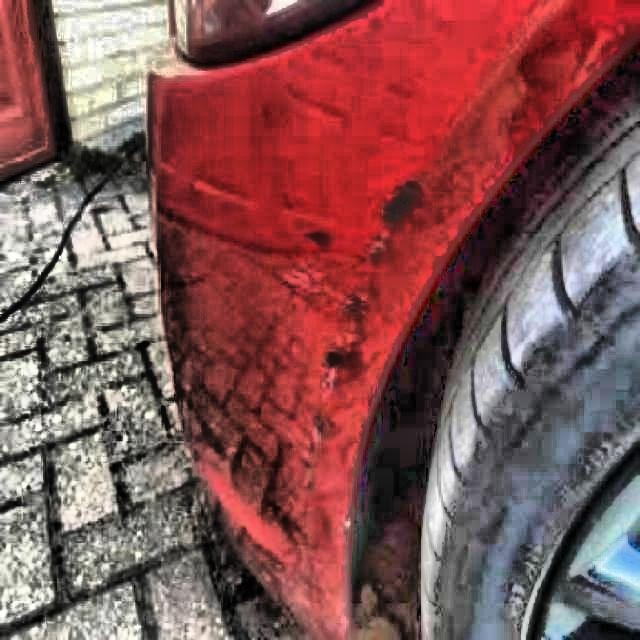

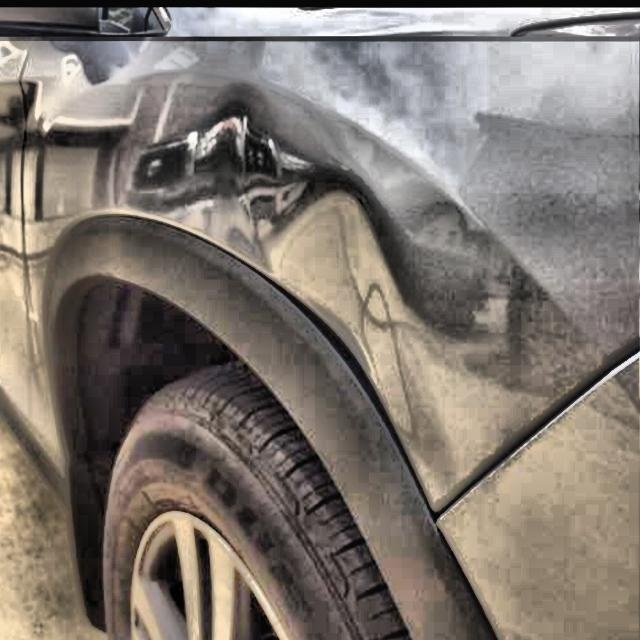

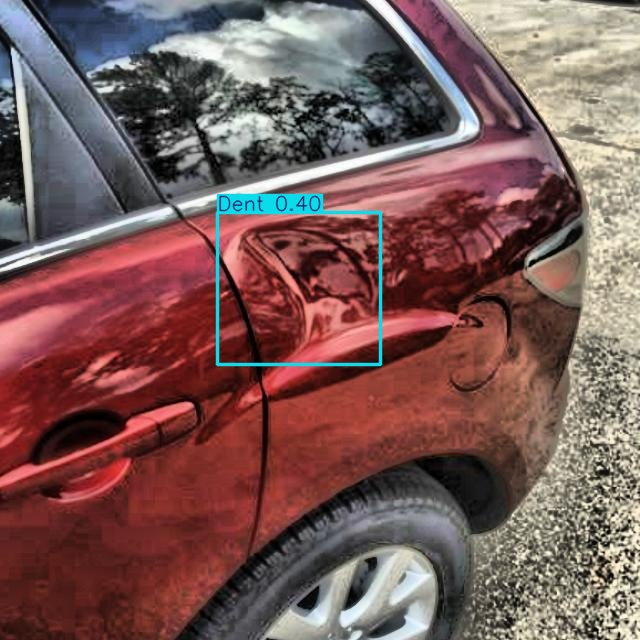

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")